# A sampler study

In this notebook, we perform a short study of how various samplers implemented in pyPESTO perform.

## The pipeline

First, we show a typical workflow, fully integrating the samplers with a [PEtab](https://github.com/petab-dev/petab) problem, using a toy example of a conversion reaction.

In [1]:
import pypesto
import petab
import numpy as np

# import to petab
petab_problem = petab.Problem.from_yaml(
    "conversion_reaction/conversion_reaction.yaml")
# import to pypesto
importer = pypesto.PetabImporter(petab_problem)
# create problem
problem = importer.create_problem()

In [2]:
sampler = pypesto.AdaptiveParallelTemperingSampler(
    internal_sampler=pypesto.AdaptiveMetropolisSampler(),
    n_chains=3)

In [3]:
result = pypesto.sample(problem, n_samples=10000, sampler=sampler,x0=np.array([3,-4]))

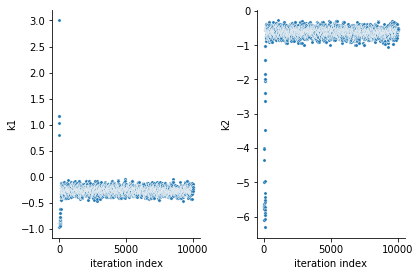

In [4]:
ax = pypesto.visualize.sampling_parameters_trace(result, use_problem_bounds=False)

Geweke Burn-in index: 500


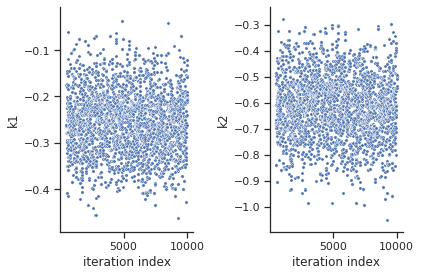

In [5]:
burn_in = pypesto.sampling.GewekeTest(result=result)
ax = pypesto.visualize.sampling_parameters_trace(result, use_problem_bounds=False,burn_in=burn_in)

Commonly, as a first step, optimization is performed, in order to find good parameter point estimates.

In [6]:
res = pypesto.minimize(problem, n_starts=10)

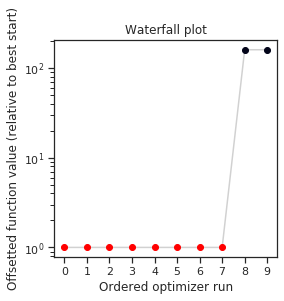

In [7]:
pypesto.visualize.waterfall(res, size=(4,4))

Next, we perform sampling. Here, we employ a `pypesto.sample.AdaptiveParallelTemperingSampler` sampler, which runs Markov Chain Monte Carlo (MCMC) chains on different temperatures. For each chain, we employ a `pypesto.sample.AdaptiveMetropolisSampler`. For more on the samplers see below or the API documentation.

For the actual sampling, we call the `pypesto.sample` function. By passing the result object to the function, the previously found global optimum is used as starting point for the MCMC sampling.

In [8]:
res = pypesto.sample(problem, n_samples=10000, sampler=sampler,result=res)

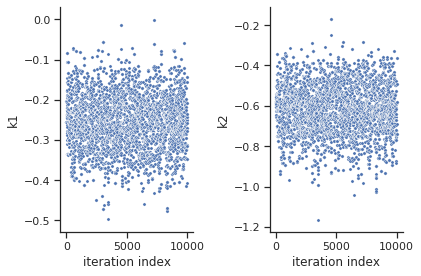

In [9]:
ax = pypesto.visualize.sampling_parameters_trace(res, use_problem_bounds=False)

When the sampling is finished, we can analyse our results. pyPESTO provides functions to analyse both the sampling process as well as the obtained sampling result. Visualizing the traces e.g. allows to detect burn-in phases, or fine-tune hyperparameters. First, the parameter trajectories  can be visualized:

Geweke Burn-in index: 0


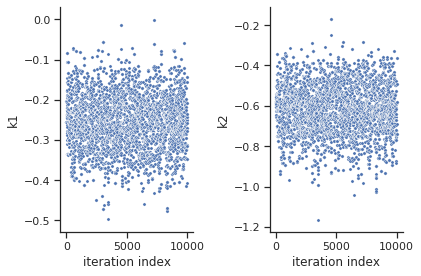

In [10]:
burn_in = pypesto.sampling.GewekeTest(result=res)
ax = pypesto.visualize.sampling_parameters_trace(res, use_problem_bounds=False,burn_in=burn_in)

Next, also the log posterior trace can be visualized: